In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'sklearn'

In [48]:
#Load the data
path = "C:/Users/aleky/Downloads/diabetes.csv"
data = pd.read_csv(path)

In [10]:
#to check the first 7 rows of dataset
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [11]:
# Set seed
np.random.seed(77)

In [12]:
# Now to take a random sample of 25 observations
randomsample = data.sample(n=25)

In [13]:
#to get the first five rows of sample
randomsample.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
684,5,136,82,0,0,0.0,0.640,69,0
160,4,151,90,38,0,29.7,0.294,36,0
100,1,163,72,0,0,39.0,1.222,33,1
156,2,99,52,15,94,24.6,0.637,21,0
127,1,118,58,36,94,33.3,0.261,23,0


In [16]:
#to find the mean Glucose and highest Glucose values of this sample
sample_mean_glucose = randomsample['Glucose'].mean()
sample_highest_glucose = randomsample['Glucose'].max()

In [17]:
print(sample_mean_glucose)

117.32


In [18]:
print(sample_highest_glucose)

189


In [19]:
# To find the mean and highest glucose values of the population
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

In [20]:
print(population_mean_glucose)

120.89453125


In [21]:
print(population_highest_glucose)

199


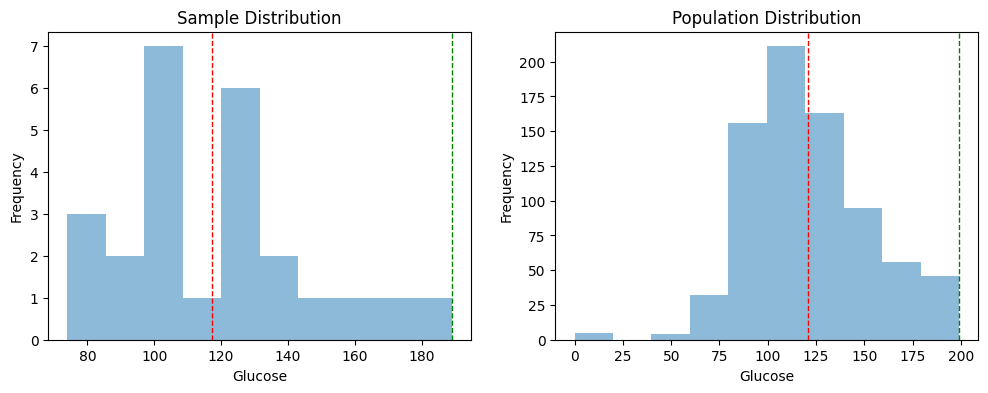

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].hist(randomsample['Glucose'], bins=10, alpha=0.5)
ax[0].axvline(sample_mean_glucose, color='r', linestyle='dashed', linewidth=1)
ax[0].axvline(sample_highest_glucose, color='g', linestyle='dashed', linewidth=1)
ax[0].set_title('Sample Distribution')
ax[0].set_xlabel('Glucose')
ax[0].set_ylabel('Frequency')
ax[1].hist(data['Glucose'], bins=10, alpha=0.5)
ax[1].axvline(population_mean_glucose, color='r', linestyle='dashed', linewidth=1)
ax[1].axvline(population_highest_glucose, color='g', linestyle='dashed', linewidth=1)
ax[1].set_title('Population Distribution')
ax[1].set_xlabel('Glucose')
ax[1].set_ylabel('Frequency')
plt.show()

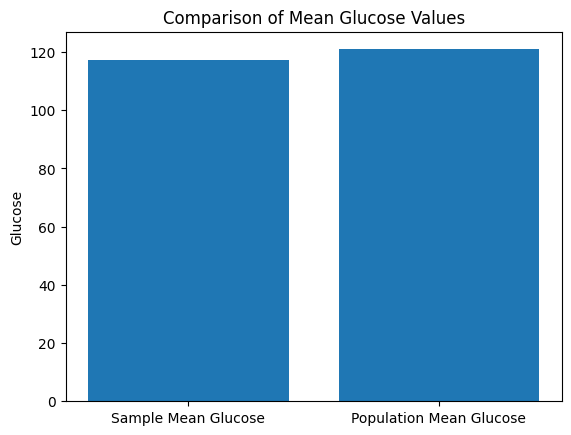

In [30]:
#creating the bar graph for the Mean sample vs population 
fig, ax = plt.subplots()
ax.bar(['Sample Mean Glucose', 'Population Mean Glucose'], [sample_mean_glucose, population_mean_glucose])
ax.set_ylabel('Glucose')
ax.set_title('Comparison of Mean Glucose Values')
plt.show()

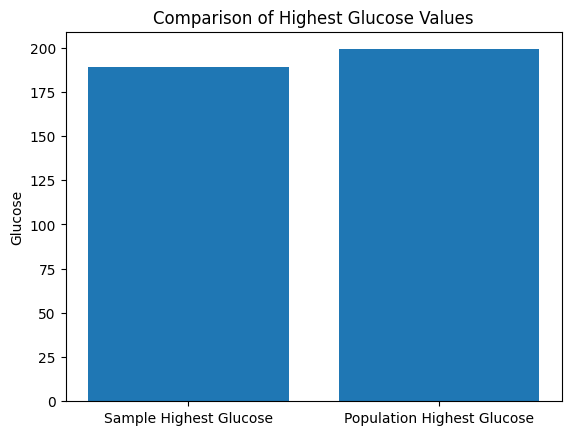

In [29]:
#creating the bar graph for Highest sample vs population 
fig, ax = plt.subplots()
ax.bar(['Sample Highest Glucose', 'Population Highest Glucose'], [sample_highest_glucose, population_highest_glucose])
ax.set_ylabel('Glucose')
ax.set_title('Comparison of Highest Glucose Values')
plt.show()


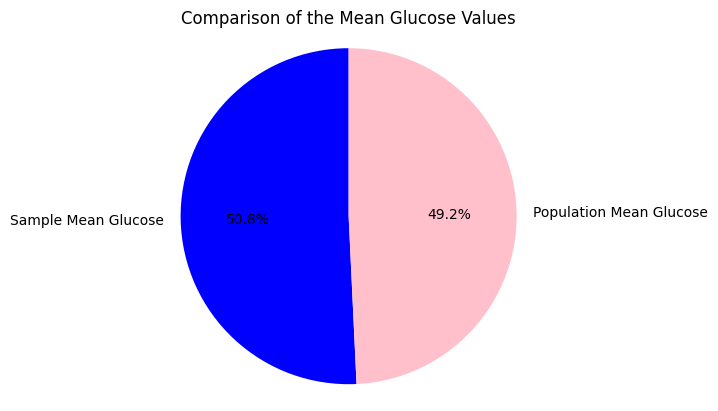

In [33]:
# Create pie chart of mean Glucose values for sample and population 
labels = ["Sample Mean Glucose", "Population Mean Glucose"]
sizes = [data["Glucose"].mean(), sample_mean_glucose]
colors = ["blue", "pink"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Comparison of the Mean Glucose Values")
plt.show()

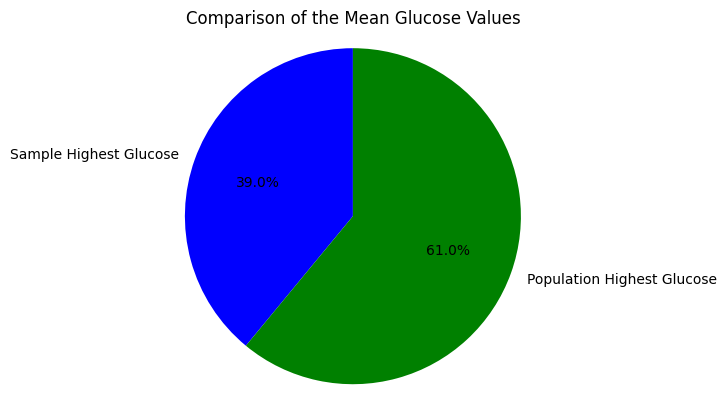

In [37]:
# Create pie chart of Highest Glucose values for sample and population 
labels = ["Sample Highest Glucose", "Population Highest Glucose"]
sizes = [data["Glucose"].mean(), sample_highest_glucose]
colors = ["blue", "green"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Comparison of the Mean Glucose Values")
plt.show()

In [39]:
#finding the 98th percentile of sample
sample_bmi = np.percentile(randomsample['BMI'], 98)
print(sample_bmi)

39.312


In [40]:
#finding the 98th percentile of Population
population_bmi = np.percentile(data['BMI'], 98)
print(population_bmi)

47.52599999999996


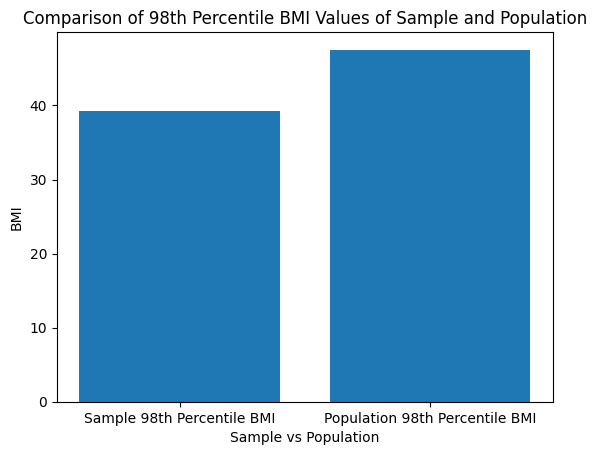

In [43]:
fig, ax = plt.subplots()
ax.bar(['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'], [sample_bmi, population_bmi])
ax.set_xlabel("Sample vs Population")
ax.set_ylabel('BMI')
ax.set_title('Comparison of 98th Percentile BMI Values of Sample and Population')
plt.show()

In [53]:
# Bootstrap sampling to create 500 samples of 150 observations each
samples = 500
observations = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
for i in range(samples):
    sample = data.sample(n=observations, replace=True)
    bootstrap_means.append(np.mean(sample["BloodPressure"]))
    bootstrap_stds.append(np.std(sample["BloodPressure"]))
    bootstrap_percentiles.append(np.percentile(sample["BloodPressure"], 90))


In [56]:
#find the mean BMI of the bootstrap sample

print("Bootstrap Sample mean BMI:", np.mean(bootstrap_means))

Bootstrap Sample mean BMI: 69.11582666666666


In [57]:
#find the Standard deviation BMI of the bootstrap sample

print("Bootstrap Sample standard deviation BMI:", np.mean(bootstrap_stds))

Bootstrap Sample standard deviation BMI: 19.135580278087208


In [62]:
#find the Percentile BMI of the bootstrap sample

print("Bootstrap Percentile BMI:", np.mean(bootstrap_percentiles))

Bootstrap Percentile BMI: 87.33539999999999


In [59]:
# Calculate mean, standard deviation, and percentile for BloodPressure variable for population
population_mean = np.mean(data["BloodPressure"])
population_std = np.std(data["BloodPressure"])
population_percentile = np.percentile(data["BloodPressure"], 90)


In [60]:
#find the mean BMI of the population
print("Population Mean BMI:", population_mean)

Population Mean BMI: 69.10546875


In [61]:
#find the Standard deviation BMI of the population
print("Population Standard deviation BMI:", population_std)

Population Standard deviation BMI: 19.343201628981696


In [63]:
#find the Percentile BMI of the population
print("Population Percentile BMI:", population_percentile)

Population Percentile BMI: 88.0


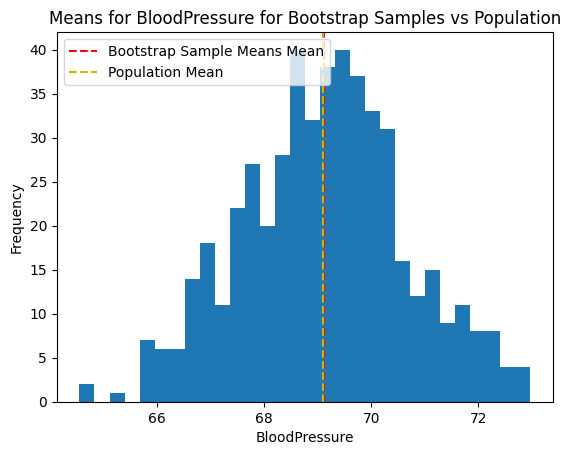

In [76]:
# Creating means for BloodPressure variable for bootstrap samples
plt.hist(bootstrap_means, bins=30)
plt.axvline(x=np.mean(bootstrap_means), color='r', linestyle='--', label="Bootstrap Sample Means Mean")
plt.axvline(x=population_mean, color='y', linestyle='--', label="Population Mean")
plt.title("Means for BloodPressure for Bootstrap Samples vs Population")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

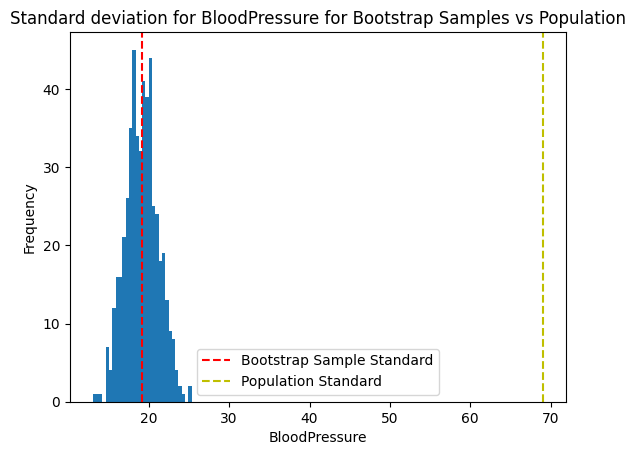

In [78]:
# Creating Standard deviation graph for BloodPressure variable for bootstrap samples
plt.hist(bootstrap_stds, bins=30)
plt.axvline(x=np.mean(bootstrap_stds), color='r', linestyle='--', label="Bootstrap Sample Standard")
plt.axvline(x=population_mean, color='y', linestyle='--', label="Population Standard")
plt.title("Standard deviation for BloodPressure for Bootstrap Samples vs Population")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

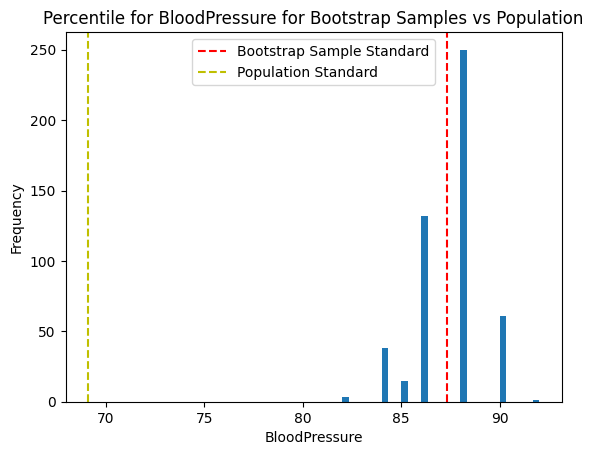

In [77]:
# Creating Percentile graph for BloodPressure variable for bootstrap samples
plt.hist(bootstrap_percentiles, bins=30)
plt.axvline(x=np.mean(bootstrap_percentiles), color='r', linestyle='--', label="Bootstrap Sample Standard")
plt.axvline(x=population_mean, color='y', linestyle='--', label="Population Standard")
plt.title("Percentile for BloodPressure for Bootstrap Samples vs Population")
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")
plt.legend()
plt.show()

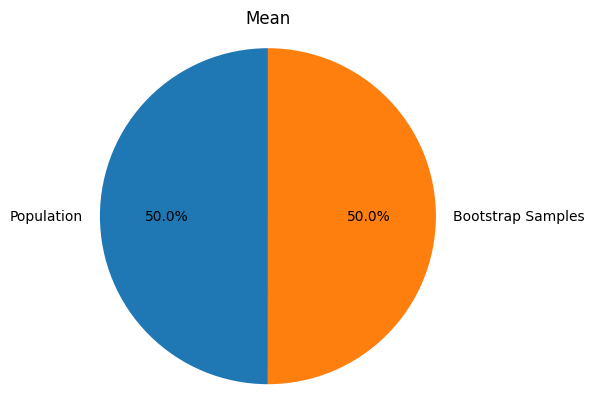

In [79]:
# Create pie chart comparing means for population and bootstrap samples
labels = ["Population", "Bootstrap Samples"]
values = [population_mean, np.mean(bootstrap_means)]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title("Mean")
plt.show()

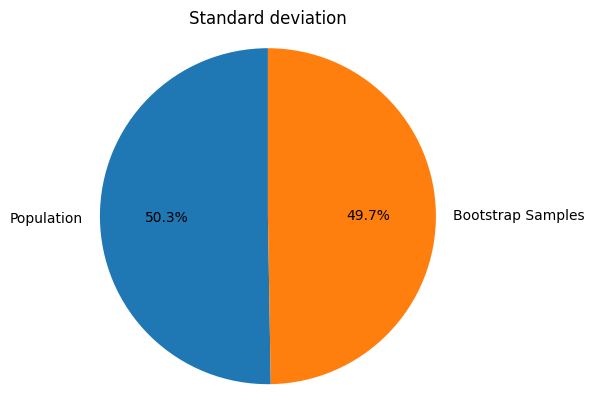

In [80]:
# Create pie chart comparing Standard deviation for population and bootstrap samples
labels = ["Population", "Bootstrap Samples"]
values = [population_std, np.mean(bootstrap_stds)]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title("Standard deviation")
plt.show()

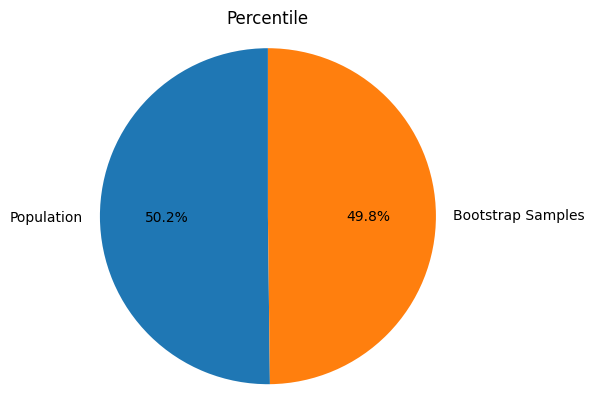

In [81]:
# Create pie chart comparing Percentile for population and bootstrap samples
labels = ["Population", "Bootstrap Samples"]
values = [population_percentile, np.mean(bootstrap_percentiles)]

fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.title("Percentile")
plt.show()

In [ ]:
#Findings : From the above comparisions, we can see the values of the bootstrap samples are almost similar to the population values. We can use the bootstrap sample values instead of the population values as the output is almost similar.